## Introducción

### Telecom X

Esta es una empresa de servicios de internet y telefonía, la cual enfrenta una alta tasa de cancelaciones y necesita comprender los factores que llevan a la pérdida de clientes


**Objetivo:**
Recopilar, procesar y analizar los datos, utilizando Python y sus principales bibliotecas para extraer información valiosa, donde podamos identificar las causas de abandono de los clientes y poder a partir de esto brindar recomendaciones y acciones a tomar.

### Importamos librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Extracción de datos

In [18]:
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'
data_from_url = pd.read_json(url)


df = pd.json_normalize(data_from_url.to_dict('records'), sep='_')
df.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


Diccionario de datos

* customerID: número de identificación único de cada cliente
* Churn: si el cliente dejó o no la empresa
* gender: género (masculino y femenino)
* SeniorCitizen: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
* Partner: si el cliente tiene o no una pareja
* Dependents: si el cliente tiene o no dependientes
* tenure: meses de contrato del cliente
* PhoneService: suscripción al servicio telefónico
* MultipleLines: suscripción a más de una línea telefónica
* InternetService: suscripción a un proveedor de internet
* OnlineSecurity: suscripción adicional de seguridad en línea
* OnlineBackup: suscripción adicional de respaldo en línea
* DeviceProtection: suscripción adicional de protección del dispositivo
* TechSupport: suscripción adicional de soporte técnico, menor tiempo de espera
* StreamingTV: suscripción de televisión por cable
* StreamingMovies: suscripción de streaming de películas
* Contract: tipo de contrato
* PaperlessBilling: si el cliente prefiere recibir la factura en línea
* PaymentMethod: forma de pago
* Charges.Monthly: total de todos los servicios del cliente por mes
* Charges.Total: total gastado por el cliente

### Primer vistazo de la estructura del dataset

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

In [20]:
df.columns

Index(['customerID', 'Churn', 'customer_gender', 'customer_SeniorCitizen',
       'customer_Partner', 'customer_Dependents', 'customer_tenure',
       'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService',
       'internet_OnlineSecurity', 'internet_OnlineBackup',
       'internet_DeviceProtection', 'internet_TechSupport',
       'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract',
       'account_PaperlessBilling', 'account_PaymentMethod',
       'account_Charges_Monthly', 'account_Charges_Total'],
      dtype='object')

Tenemos 7267 filas y 21 columnas

In [21]:
df.shape

(7267, 21)

## Limpieza y Tratamiento de Datos

No existen duplicados, lo cual es bueno para poder analizarlos

In [22]:
fs=df.shape
print('formato original : {}'.format(fs))

df = df.drop_duplicates()

ns= df.shape
print('Existen {} duplicados'.format((fs[0])-(ns[0])))
print('nuevo formato : {}'.format(ns))

formato original : (7267, 21)
Existen 0 duplicados
nuevo formato : (7267, 21)


Corregimos los formatos de algunas columnas para poder trabajar mejor con ellas

In [24]:
df['account_Charges_Total'] = df['account_Charges_Total'].replace(' ', np.nan)
df['account_Charges_Total'] = pd.to_numeric(df['account_Charges_Total'], errors='coerce')
df['customer_SeniorCitizen'] = df['customer_SeniorCitizen'].map({0:'No',1:'Yes'})

In [25]:
df.dtypes

,0
customerID,object
Churn,object
customer_gender,object
customer_SeniorCitizen,object
customer_Partner,object
customer_Dependents,object
customer_tenure,int64
phone_PhoneService,object
phone_MultipleLines,object
internet_InternetService,object


Vemos que tenemos 11 datos nulos en la columna account_Charges_Total, pero buscaremos la manera de llenar estos datos con información del mismo dataset para que sea lo más cercano a lo real.

In [26]:
df.isnull().sum()

,0
customerID,0
Churn,0
customer_gender,0
customer_SeniorCitizen,0
customer_Partner,0
customer_Dependents,0
customer_tenure,0
phone_PhoneService,0
phone_MultipleLines,0
internet_InternetService,0


### Tratamiento de nulos

Tratamos los nulos, básicamente el account_Charges_Total es igual al número de meses que lleva el cliente en el servicio, multiplicado por el cargo mensual y el resultado de esa operación lo guardamos en las columnas que estén vacías en account_Charges_Total

In [29]:
df.loc[df['account_Charges_Total'].isnull(), 'account_Charges_Total'] = df['customer_tenure'] * df['account_Charges_Monthly']

In [30]:
df.isnull().sum()

,0
customerID,0
Churn,0
customer_gender,0
customer_SeniorCitizen,0
customer_Partner,0
customer_Dependents,0
customer_tenure,0
phone_PhoneService,0
phone_MultipleLines,0
internet_InternetService,0


## Análisis Exploratorio de Datos

### Distribuciones

Revisando la distribución de los datos en general, todo se ve bien, solo unos atípicos en la columna account_Charges_Total, pero nada de qué alertarse, ya que veremos bien la distribución y haremos más análisis posteriormente

In [27]:
df.describe()

,customer_tenure,account_Charges_Monthly,account_Charges_Total
count,7267.000000,7267.000000,7256.000000
mean,32.346498,64.720098,2280.634213
std,24.571773,30.129572,2268.632997
min,0.000000,18.250000,18.800000
25%,9.000000,35.425000,400.225000
50%,29.000000,70.300000,1391.000000
75%,55.000000,89.875000,3785.300000
max,72.000000,118.750000,8684.800000


Dando un vistazo rápido podemos ver que en columnas de sí y no existen más categorías lo cual puede ser provocado por un error de tipificación, pero es algo fácil de arreglar, en general podemos ver cuantas categorías existen por columnas y un poco de su distribución; sin embargo, corregiremos estos errores y realizaremos análisis más profundos.

In [28]:
df.describe(include=object)

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,phone_PhoneService,phone_MultipleLines,internet_InternetService,internet_OnlineSecurity,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod
count,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267
unique,7267,3,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4
top,9995-HOTOH,No,Male,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
freq,1,5174,3675,6085,3749,5086,6560,3495,3198,3608,3182,3195,3582,2896,2870,4005,4311,2445


In [31]:
def resumen_columna(col):
    return df[col].value_counts(normalize=False).to_frame('Número de registros')\
             .assign(Proporción=lambda x: (x['Número de registros'] / x['Número de registros'].sum() * 100).round(2))\
             .reset_index().rename(columns={'index': col})

In [33]:
cat = df.select_dtypes(include='object').columns[1:]

for i in cat:
  print(i)
  print(resumen_columna(i))
  print('\n\n')

Churn
  Churn  Número de registros  Proporción
0    No                 5174       71.20
1   Yes                 1869       25.72
2                        224        3.08



customer_gender
  customer_gender  Número de registros  Proporción
0            Male                 3675       50.57
1          Female                 3592       49.43



customer_SeniorCitizen
  customer_SeniorCitizen  Número de registros  Proporción
0                     No                 6085       83.73
1                    Yes                 1182       16.27



customer_Partner
  customer_Partner  Número de registros  Proporción
0               No                 3749       51.59
1              Yes                 3518       48.41



customer_Dependents
  customer_Dependents  Número de registros  Proporción
0                  No                 5086       69.99
1                 Yes                 2181       30.01



phone_PhoneService
  phone_PhoneService  Número de registros  Proporción
0                Y

#### Columna de cuentas diarias

In [72]:
df['Daily_Accounts'] = df['account_Charges_Monthly'] / 30

Revisando las distribuciones y lo que se captó anteriormente, se observó que la variable objetivo churn tiene algunos espacios en blanco, lo cual es grave, ya que esta columna es la que más nos interesa para el análisis y que no podemos calcular, a lo cual se decidió eliminar estos datos, ya que no son representativos y apenas son el 3% del dataset lo cual se cree que no influirá en los resultados de este análisis.

In [34]:
df = df[df['Churn'].isin(['Yes', 'No'])]

In [58]:
def graficos_cat(df, columna, label, palette=None):
    titulo = f"Distribución de {label}"
def graficos_cat(df, columna, label, palette=None):
    titulo = f"Distribución de {label}"

    plt.figure(figsize=(8, 5))
    sns.countplot(x=columna, data=df, order=df[columna].value_counts().index, palette=('gray' if palette is None else palette))
    plt.title(titulo)
    plt.xlabel(label)
    plt.ylabel("Frecuencia")
    plt.tight_layout()
    plt.show()

In [117]:
def graficos(columna, label, color):
  fig, axs = plt.subplots(1, 2, figsize=(20, 6))
  x = columna
  label = label
  titulo = f"Distribucion de {label}"
  color = color

  #Se hace el boxplot para visualizar los atipicos y la distribucion, vemos que existen atipicos.
  sns.boxplot( x=x, data= df, color=color, ax=axs[0], hue='Churn')
  axs[0].set_title(titulo)
  axs[0].set_xlabel(label)

  sns.histplot(data=df, x=x, kde=True, ax=axs[1])
  axs[1].set_title(titulo)
  axs[1].set_xlabel(label)

#### Churn

Como se puede observar, casi el 27% de los clientes ha abandonado la compañía, lo cual corrobora lo que se planteaba en un principio. Una vez teniendo en cuenta esto, vamos a buscar cuáles son las posibles causas.

In [35]:
resumen_columna('Churn')

,Churn,Número de registros,Proporción
0,No,5174,73.46
1,Yes,1869,26.54


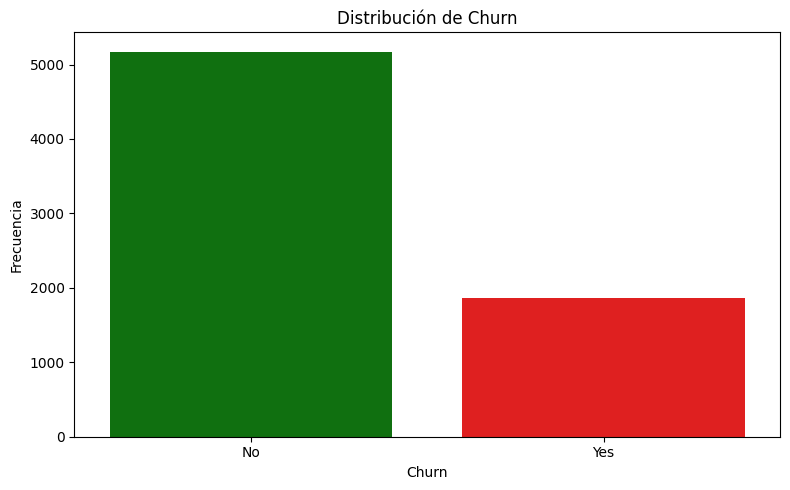

In [60]:
graficos_cat(df, 'Churn', 'Churn', palette={'No': 'Green', 'Yes': 'red'})

### Creación de subgrupos para analizar tendencias de cada grupo

In [61]:
df_churn = df[df['Churn'] == 'Yes']
df_nochurn = df[df['Churn'] == 'No']

#### Antigüedad

Como se puede observar, el promedio de meses de antigüedad muestra un primer acercamiento donde personas que no abandonaron tienen una media de 37.6, frente a las que abandonaron de 17.97. Esto mostrando un indicio, pero no una certeza, ya que aunque el promedio es más alto, aún existen personas con varios meses que también abandonaron, a lo cual veremos con más de talle a lo que se debe.

In [66]:
print(f"Antiguedad promedio clientes que abandonaron: {df_churn['customer_tenure'].mean()}")
print(f"Antiguedad minima clientes que abandonaron: {df_churn['customer_tenure'].min()}")
print(f"Antiguedad maxima clientes que abandonaron: {df_churn['customer_tenure'].max()}")

Antiguedad promedio clientes que abandonaron: 17.979133226324237
Antiguedad minima clientes que abandonaron: 1
Antiguedad maxima clientes que abandonaron: 72


In [67]:
print(f"Antiguedad promedio clientes que no abandonaron: {df_nochurn['customer_tenure'].mean()}")
print(f"Antiguedad minima clientes que no abandonaron: {df_nochurn['customer_tenure'].min()}")
print(f"Antiguedad maxima clientes que no abandonaron: {df_nochurn['customer_tenure'].max()}")

Antiguedad promedio clientes que no abandonaron: 37.56996521066873
Antiguedad minima clientes que no abandonaron: 0
Antiguedad maxima clientes que no abandonaron: 72


Text(0.5, 0, 'Meses de antiguedad')

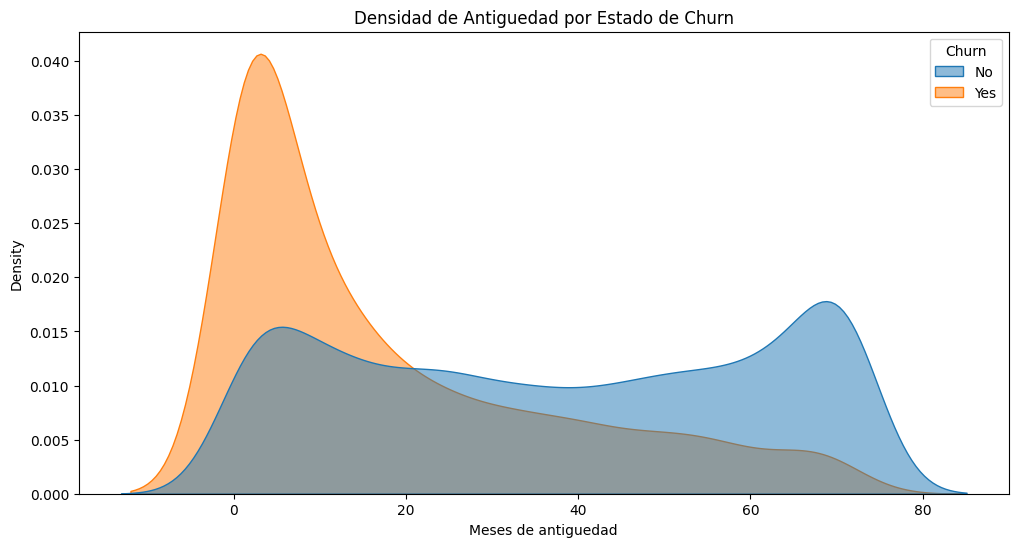

In [123]:
plt.figure(figsize=(12,6))
sns.kdeplot(
    data=df,
    x='customer_tenure',
    hue='Churn',
    fill=True,
    common_norm=False,
    palette=['#1f77b4','#ff7f0e'],
    alpha=0.5
)
plt.title('Densidad de Antigüedad por Estado de Churn')
plt.xlabel('Meses de Antigüedad')

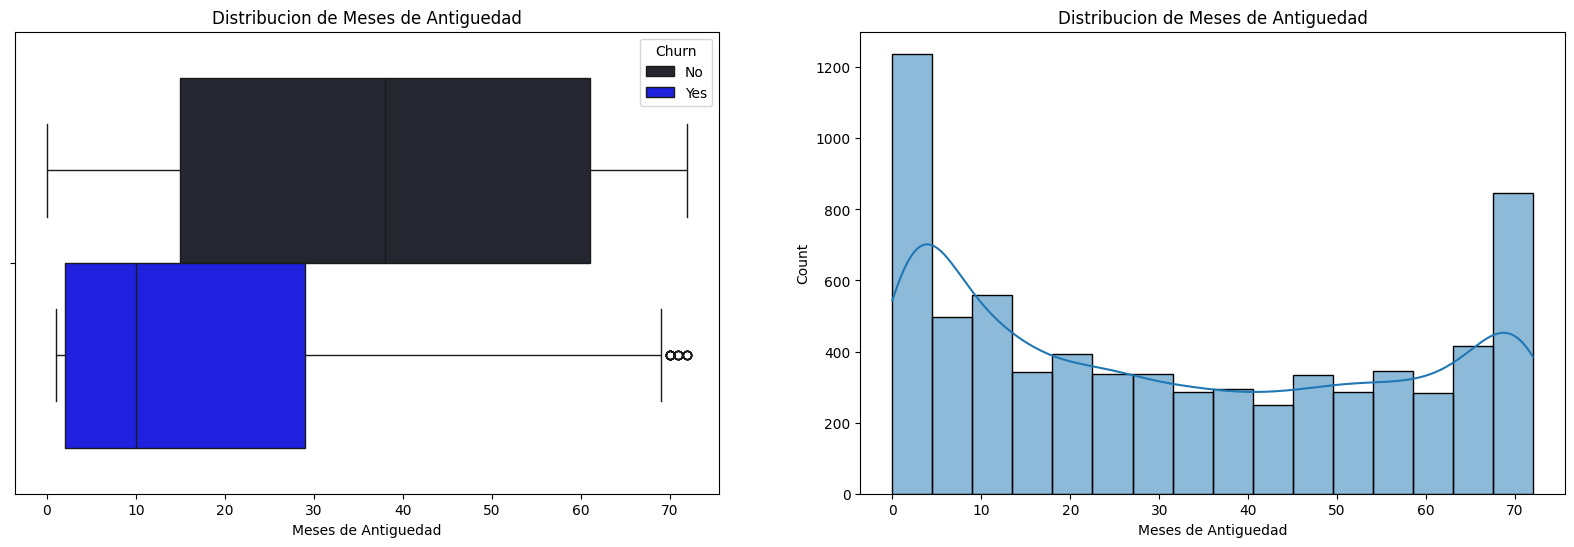

In [118]:
graficos('customer_tenure', 'Meses de Antigüedad', 'blue')

#### Tipo de contrato

Podemos notar que la mayor parte de los clientes tienen contrato de mes a mes con aproximadamente el 55% y de estos clientes el 42% tiende a irse de nuestra compañía, lo cual no es nada favorable, así que una de las primeras acciones recomendadas es empezar a vender contratos de un año o dos años, ya que en estos tipos de contratos los que abandonan son menos del 12% para los de un año y menos del 1% para los de dos años, a lo cual sería ideal vender más de estos contratos o crear un nuevo tipo de contrato de 3 o 6 meses buscando que los clientes tiendan a acostumbrarse a contratos más largos, para esto podemos promocionar con más beneficios a contratos largos.

In [70]:
resumen_columna('account_Contract')

,account_Contract,Número de registros,Proporción
0,Month-to-month,3875,55.02
1,Two year,1695,24.07
2,One year,1473,20.91


In [69]:
df.groupby('account_Contract')['Churn'].value_counts(normalize=True).unstack()

Churn,No,Yes
account_Contract,,
Month-to-month,0.572903,0.427097
One year,0.887305,0.112695
Two year,0.971681,0.028319


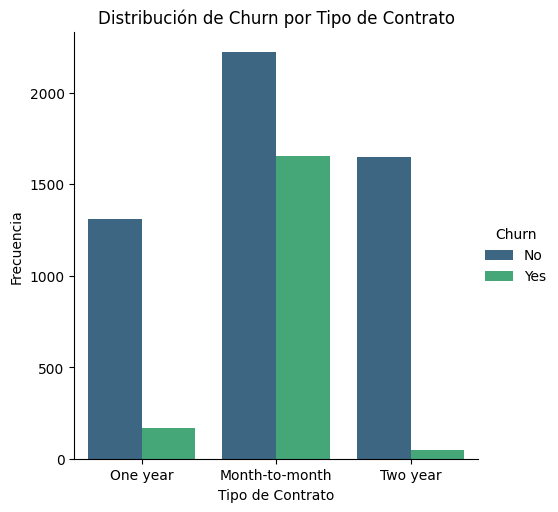

In [77]:
sns.catplot(
    x='account_Contract',
    hue='Churn',
    data=df,
    kind='count',
    palette='viridis'
)
plt.title('Distribución de Churn por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Frecuencia')
plt.show()

#### Método de pago

En este caso encontramos que los pagos realizados por Electronic check son los que más tienden a abandonar la compañía con aproximadamente un 45% de los pagos que se hacen por este medio abandonan la compañía, y aproximadamente el 34% realiza pagos por este medio, lo que podemos hacer es investigar posibles problemas con el medio de pago Electronic check, e incentivar otros medios de pago para reducir el churn

In [73]:
resumen_columna('account_PaymentMethod')

,account_PaymentMethod,Número de registros,Proporción
0,Electronic check,2365,33.58
1,Mailed check,1612,22.89
2,Bank transfer (automatic),1544,21.92
3,Credit card (automatic),1522,21.61


In [74]:
df.groupby('account_PaymentMethod')['Churn'].value_counts(normalize=True).unstack()

Churn,No,Yes
account_PaymentMethod,,
Bank transfer (automatic),0.832902,0.167098
Credit card (automatic),0.847569,0.152431
Electronic check,0.547146,0.452854
Mailed check,0.808933,0.191067


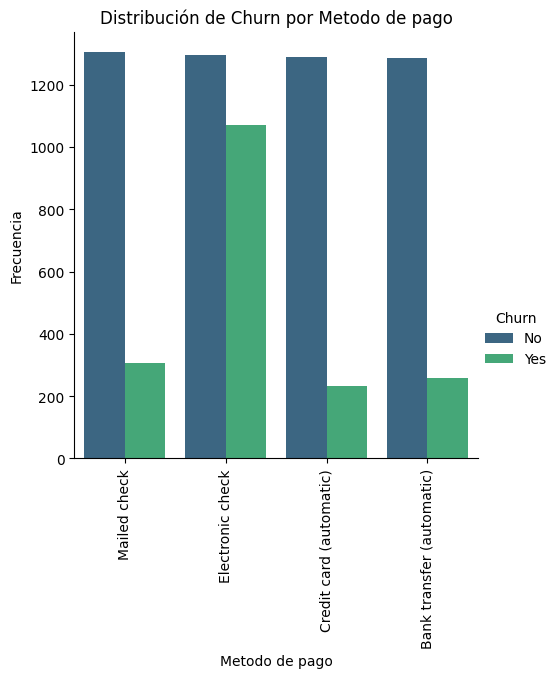

In [82]:
sns.catplot(
    x='account_PaymentMethod',
    hue='Churn',
    data=df,
    kind='count',
    palette='viridis'
)
plt.title('Distribución de Churn por Metodo de pago')
plt.xlabel('Metodo de pago')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)
plt.show()

####Genero

En general en el dataset muestra que nuestra proporción de hombres y mujeres es aproximadamente 50-50 a lo cual si vamos un poco más allá vemos que en general tanto de hombres, como de mujeres tenemos aproximadamente un 27% de abandono de la empresa, lo cual podemos decir que asumen un patrón similar; sin embargo, lo analizaremos más profundidad.

In [84]:
resumen_columna('customer_gender')

,customer_gender,Número de registros,Proporción
0,Male,3555,50.48
1,Female,3488,49.52


In [85]:
df.groupby('customer_gender')['Churn'].value_counts(normalize=True).unstack()

Churn,No,Yes
customer_gender,,
Female,0.730791,0.269209
Male,0.738397,0.261603


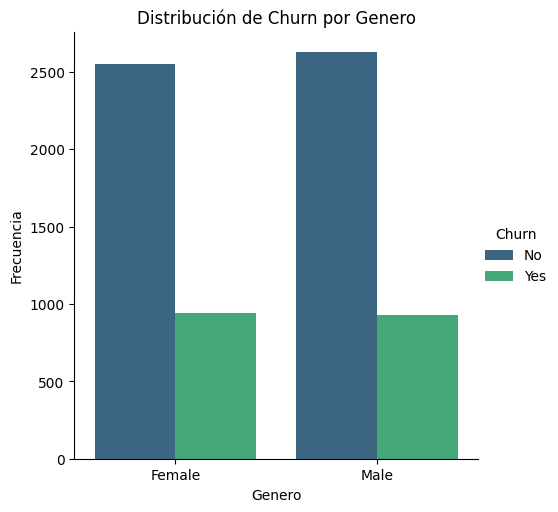

In [92]:
sns.catplot(
    x='customer_gender',
    hue='Churn',
    data=df,
    kind='count',
    palette='viridis'
)
plt.title('Distribución de Churn por Genero')
plt.xlabel('Genero')
plt.ylabel('Frecuencia')
plt.show()

#### Servicio de internet

Como podemos observar la mayoría tiene un servicio de internet y la mayoría tiene fibra óptica con aproximadamente un 44%, de los cuales el 41% tienden a abandonar la compañía a lo cual podemos revisar cuestiones de servicio o problemas con este servicio, ya que en los otros no se presenta esta tendencia y la tasa de abandono es baja.

In [89]:
resumen_columna('internet_InternetService')

,internet_InternetService,Número de registros,Proporción
0,Fiber optic,3096,43.96
1,DSL,2421,34.37
2,No,1526,21.67


In [91]:
df.groupby('internet_InternetService')['Churn'].value_counts(normalize=True).unstack()

Churn,No,Yes
internet_InternetService,,
DSL,0.810409,0.189591
Fiber optic,0.581072,0.418928
No,0.925950,0.074050


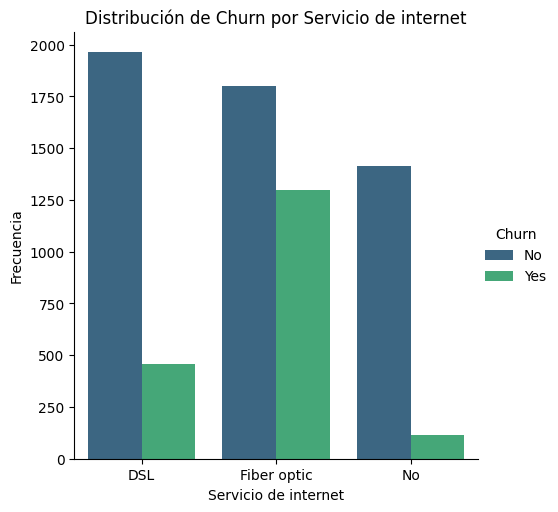

In [98]:
sns.catplot(
    x='internet_InternetService',
    hue='Churn',
    data=df,
    kind='count',
    palette='viridis'
)
plt.title('Distribución de Churn por Servicio de internet')
plt.xlabel('Servicio de internet')
plt.ylabel('Frecuencia')
plt.show()

In [101]:
pd.crosstab(
    index=df[df['internet_InternetService']=='Fiber optic']['internet_OnlineSecurity'],
    columns=df['Churn'],
    normalize='index'
)

Churn,No,Yes
internet_OnlineSecurity,,
No,0.506424,0.493576
Yes,0.781883,0.218117


#### Servicio de Telefonía

Como podemos observar la mayoría de los clientes tienen un servicio de telefonía, en aproximadamente un 90%, de los cuales aproximadamente el 27% tiende a abandonar, aunque los que no tienen servicio andan en un porcentaje de abandono similar, la cantidad de clientes que si tienen servicio de telefonía es mayor, como he mencionado anteriormente esto se puede deber a problemas con el servicio o problemas adicionales, a lo cual será mejor busca estas causas, ya que generalmente las causas de abandono más comunes son por problemas con el servicio.

In [94]:
resumen_columna('phone_PhoneService')

,phone_PhoneService,Número de registros,Proporción
0,Yes,6361,90.32
1,No,682,9.68


In [95]:
df.groupby('phone_PhoneService')['Churn'].value_counts(normalize=True).unstack()

Churn,No,Yes
phone_PhoneService,,
No,0.750733,0.249267
Yes,0.732904,0.267096


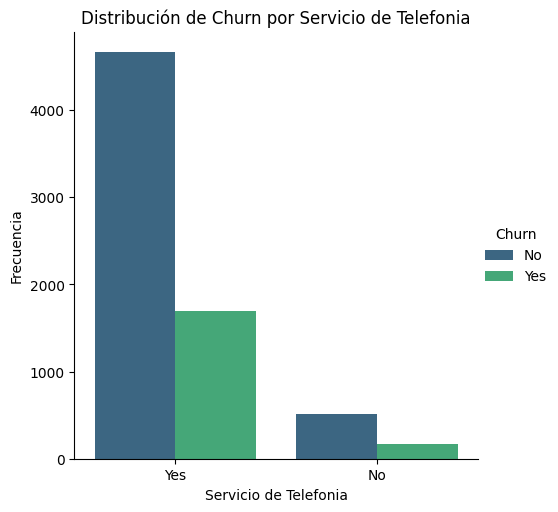

In [99]:
sns.catplot(
    x='phone_PhoneService',
    hue='Churn',
    data=df,
    kind='count',
    palette='viridis'
)
plt.title('Distribución de Churn por Servicio de Telefonia')
plt.xlabel('Servicio de Telefonia')
plt.ylabel('Frecuencia')
plt.show()

#### Cargos mensuales

Otro factor que influye mucho en el abandono de la empresa puede ser este el account_Charges_Monthly, ya que algo curioso es que los clientes que pagan más son los que tienden a abandonar la empresa, esto debido a precios altos, lo cual puede ser una razón bastante válida, a lo cual podemos revisar para hacer promociones y reducciones de precio para estos clientes.

In [120]:
print(f"Cargos mensuales promedio clientes que abandonaron: {df_churn['account_Charges_Monthly'].mean()}")
print(f"Cargos mensuales minimos clientes que abandonaron: {df_churn['account_Charges_Monthly'].min()}")
print(f"Cargos mensuales maximos clientes que abandonaron: {df_churn['account_Charges_Monthly'].max()}")

Cargos mensuales promedio clientes que abandonaron: 74.44133226324237
Cargos mensuales minimos clientes que abandonaron: 18.85
Cargos mensuales maximos clientes que abandonaron: 118.35


In [121]:
print(f"Cargos mensuales promedio clientes que no abandonaron: {df_nochurn['account_Charges_Monthly'].mean()}")
print(f"Cargos mensuales minimos clientes que no abandonaron: {df_nochurn['account_Charges_Monthly'].min()}")
print(f"Cargos mensuales maximos clientes que no abandonaron: {df_nochurn['account_Charges_Monthly'].max()}")

Cargos mensuales promedio clientes que no abandonaron: 61.26512369540008
Cargos mensuales minimos clientes que no abandonaron: 18.25
Cargos mensuales maximos clientes que no abandonaron: 118.75


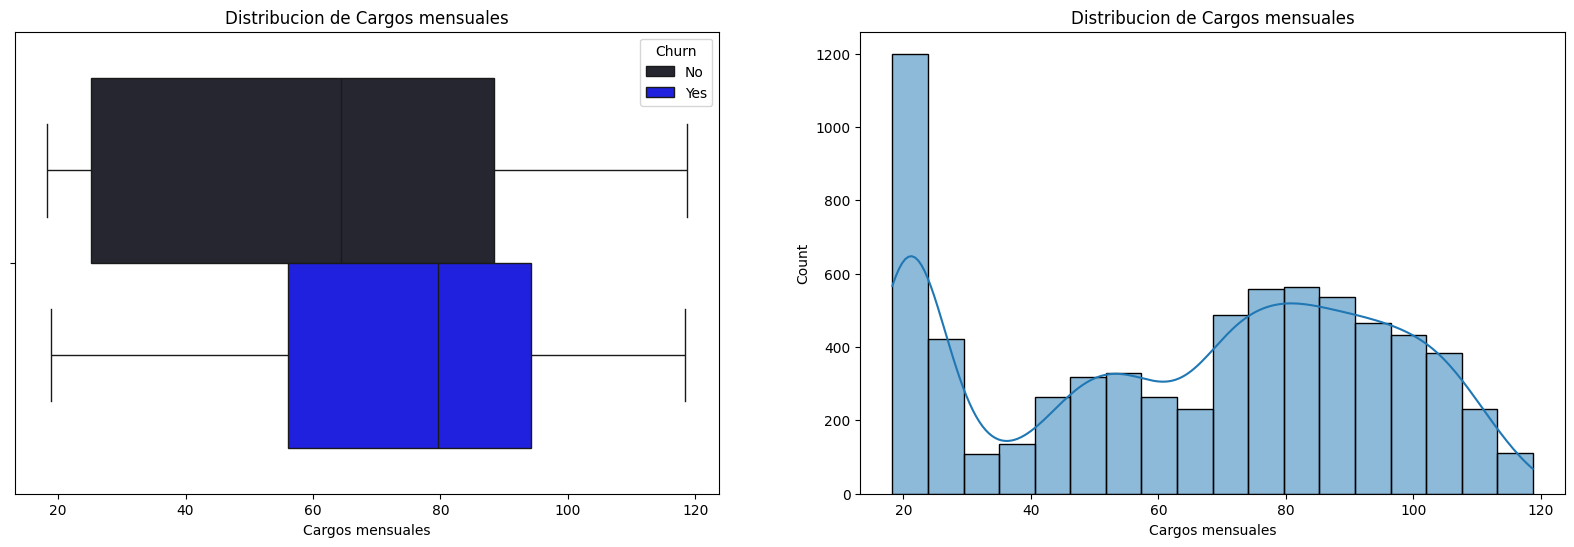

In [122]:
graficos('account_Charges_Monthly', 'Cargos mensuales', 'blue')

Text(0.5, 0, 'Cargo mensual (USD)')

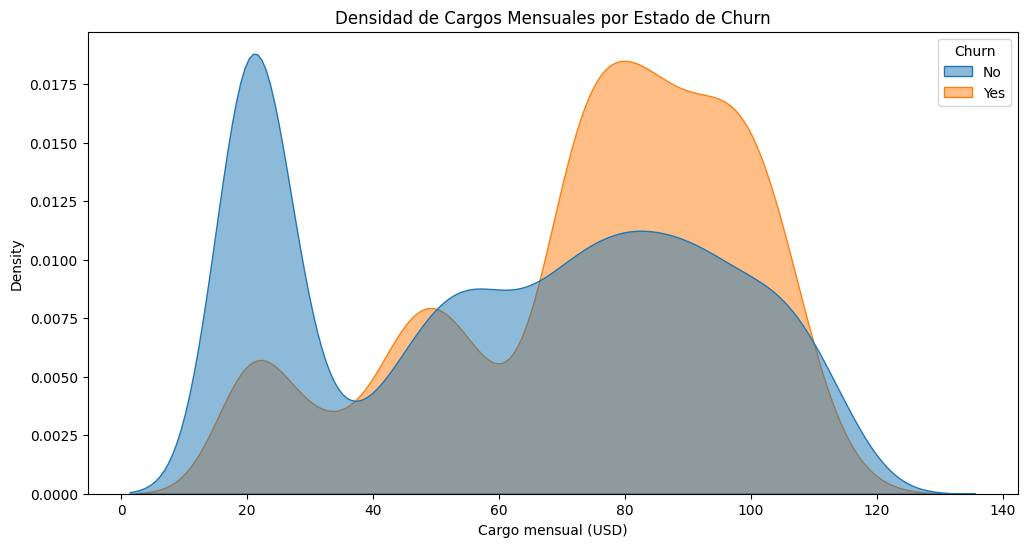

In [119]:
plt.figure(figsize=(12,6))
sns.kdeplot(
    data=df,
    x='account_Charges_Monthly',
    hue='Churn',
    fill=True,
    common_norm=False,
    palette=['#1f77b4','#ff7f0e'],
    alpha=0.5
)
plt.title('Densidad de Cargos Mensuales por Estado de Churn')
plt.xlabel('Cargo mensual (USD)')

#### Cargos totales

Como era de esperar, los cargos totales de las personas que abandonaron son más bajos que de las personas que no abandonaron, lo cual a su vez nos muestra que es más conveniente tener clientes que no abandonen, incluso si eso significa reducir los precios.

In [124]:
print(f"Cargos Totales promedio clientes que abandonaron: {df_churn['account_Charges_Total'].mean()}")
print(f"Cargos Totales minimos clientes que abandonaron: {df_churn['account_Charges_Total'].min()}")
print(f"Cargos Totales maximos clientes que abandonaron: {df_churn['account_Charges_Total'].max()}")

Cargos Totales promedio clientes que abandonaron: 1531.7960941680044
Cargos Totales minimos clientes que abandonaron: 18.85
Cargos Totales maximos clientes que abandonaron: 8684.8


In [125]:
print(f"Cargos Totales promedio clientes que no abandonaron: {df_nochurn['account_Charges_Total'].mean()}")
print(f"Cargos Totales minimos clientes que no abandonaron: {df_nochurn['account_Charges_Total'].min()}")
print(f"Cargos Totales maximos clientes que no abandonaron: {df_nochurn['account_Charges_Total'].max()}")

Cargos Totales promedio clientes que no abandonaron: 2549.9114418245067
Cargos Totales minimos clientes que no abandonaron: 0.0
Cargos Totales maximos clientes que no abandonaron: 8672.45


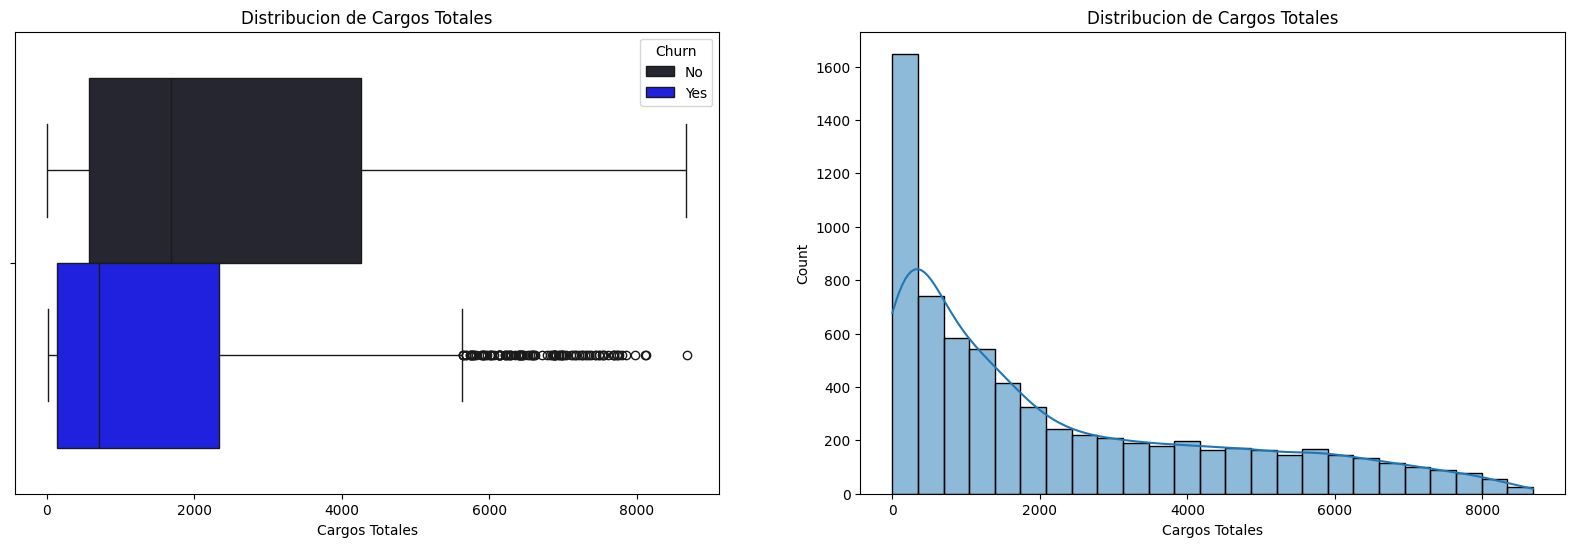

In [127]:
graficos('account_Charges_Total', 'Cargos Totales', 'blue')

Text(0.5, 0, 'Cargo Total (USD)')

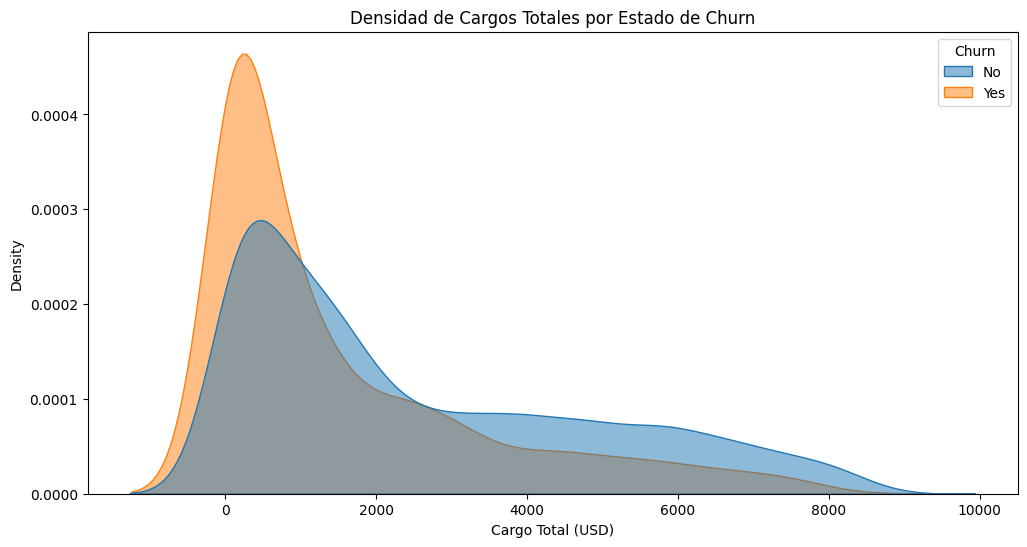

In [128]:
plt.figure(figsize=(12,6))
sns.kdeplot(
    data=df,
    x='account_Charges_Total',
    hue='Churn',
    fill=True,
    common_norm=False,
    palette=['#1f77b4','#ff7f0e'],
    alpha=0.5
)
plt.title('Densidad de Cargos Totales por Estado de Churn')
plt.xlabel('Cargo Total (USD)')

##Conclusiones

Conclusiones del Análisis de Churn en Telecom X
1. Tasa de Churn Alarmante:

* 26.54% de los clientes abandonaron el servicio, lo que representa una pérdida significativa de ingresos y justifica acciones urgentes de retención.

* Nuevos clientes son más vulnerables: Quienes churnearon tenían una antigüedad promedio de ~18 meses, frente a ~38 meses de los clientes leales. Esto sugiere que el primer año y medio es crítico para la retención.


2. Factores Clave Asociados al Churn
* Tipo de contrato:

55% de los clientes tienen contratos Month-to-month (sin compromiso a largo plazo), lo que facilita el abandono.

Solo 24% tienen contratos de 2 años (menor tasa de churn).


* Servicios de Internet:

44% usan Fiber optic (asociado a mayores cargos mensuales).Ademas de que requiere servicios adicionales, donde la mayoria no los contrata.

3. Patrones Económicos
* Clientes que abandonan pagan más mensualmente:

Cargo mensual promedio de clientes que churnearon: $74 USD  vs $61 USD de clientes leales.

Esto sugiere que los precios altos o planes sobrecargados impulsan el abandono, especialmente en combinación con contratos flexibles (Month-to-month).

4. Calidad de Datos y Preprocesamiento
* Se corrigieron 11 valores nulos en account_Charges_Total usando lógica de negocio (tenure * monthly_charge).

* Se eliminaron 224 registros (3%) con Churn faltante, sin impacto significativo en el análisis.

* La conversión de SeniorCitizen a categórico (16% son seniors) facilita análisis segmentados.

## Recomendaciones

1. Incentivar Contratos a Largo Plazo
Ofertar descuentos en cargos mensuales para clientes que migren de Month-to-month a contratos de 1 o 2 años.Como bonificaciones por renovación anticipada, como meses gratuitos o upgrades de servicio.

2. Revisar Estructura de Precios
Reducir cargos en servicios premium (Fiber optic) durante los primeros 18 meses para retener nuevos clientes.por ejemplo paquetes personalizados: Combinar internet de alta velocidad con servicios de valor añadido (Tech Support, Device Protection) a un precio competitivo.

3. Campañas de Fidelización Segmentadas
Enfoque en nuevos clientes (< 18 meses):

* Ofertas exclusivas: Soporte prioritario, evaluaciones gratuitas de servicio.

* Segmentar por tipo de servicio: Usuarios de Fiber optic: Paquetes con servicios adicionales incluidos.

* Seniors: Planes simplificados con soporte telefónico dedicado.

5. Monitoreo Proactivo
Sistema de alertas tempranas: Identificar clientes con patrones de riesgo (ej.: quejas frecuentes, disminución de uso).

6. Encuestas de satisfacción: Medir Net Promoter Score (NPS) tras interacciones con soporte técnico.

## Insights Clave

"La flexibilidad cuesta caro": Los contratos Month-to-month facilitan el abandono cuando los precios son percibidos como altos.

"Los nuevos miran hacia afuera": Los primeros 18 meses son la ventana crítica para retener clientes mediante incentivos y soporte excepcional.

"El internet premium necesita amor": Los usuarios de Fiber optic pagan más pero reciben poco valor añadido (Tech Support, Security), lo que genera insatisfacción.

Pasos siguientes: Profundizar en el impacto de servicios específicos (TV/streaming) y métodos de pago en el churn, y desarrollar un modelo predictivo para identificar clientes en riesgo.